In [1]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import date
import pandas_datareader.data as web
import scipy.optimize as optimization

import acquire

### Acquire the data from Yahoo finance using the helper function

In [2]:
# List the stocks you are interest
stocks = ['AAPL', 'WMT', 'TSLA', 'GE', 'AMZN', 'DB']

# Set up start and end date

start_date = '2010-01-01'
end_date = date.today()

# Download the historical data of the interested stocks
data = acquire.download_stock_data(stocks, 'yahoo', start_date, end_date)

# Take a quick peek at the data
data.head()

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2010-01-04,6.539882,41.549446,NaN,10.840267,133.899994,59.037861
2010-01-05,6.551187,41.135704,NaN,10.896401,134.690002,60.166534
2010-01-06,6.446983,41.043766,NaN,10.840267,132.250000,59.126545
2010-01-07,6.435065,41.066757,NaN,11.401575,130.000000,59.795689
2010-01-08,6.477847,40.859890,NaN,11.647147,133.520004,61.956295


In [3]:
# Quick Summary of the dataframe

print(data.shape)
print(data.info())
data.tail()

(2751, 6)
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2751 entries, 2010-01-04 to 2020-12-04
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL    2751 non-null   float64
 1   WMT     2751 non-null   float64
 2   TSLA    2629 non-null   float64
 3   GE      2751 non-null   float64
 4   AMZN    2751 non-null   float64
 5   DB      2751 non-null   float64
dtypes: float64(6)
memory usage: 150.4 KB
None


,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2020-11-30,119.050003,152.789993,567.599976,10.18,3168.040039,11.12
2020-12-01,122.720001,152.639999,584.760010,10.15,3220.080078,11.45
2020-12-02,123.080002,150.520004,568.820007,10.43,3203.530029,11.58
2020-12-03,122.940002,149.300003,593.380005,10.60,3186.729980,11.77
2020-12-04,122.250000,148.910004,599.039978,10.88,3162.580078,11.77


### Visualize the stocks data

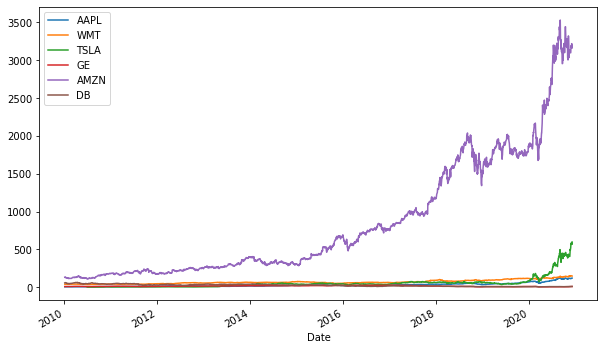

In [4]:
# Plot the adjusted closing prices over time

data.plot(figsize=(10,6))
plt.show()

### Calculate the daily returs

In [5]:
# Comppute the daily returns of the individual stock

returns = np.log(data/data.shift(1))
returns.head()

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,-0.010008,NaN,0.005165,0.005883,0.018937
2010-01-06,-0.016034,-0.002237,NaN,-0.005165,-0.018282,-0.017436
2010-01-07,-0.001850,0.000560,NaN,0.050484,-0.017160,0.011254
2010-01-08,0.006626,-0.005050,NaN,0.021310,0.026717,0.035496


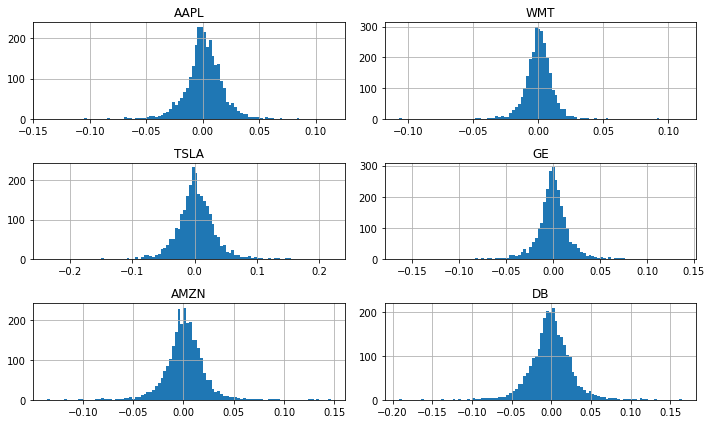

In [6]:
# Visualize the distribution of the daily returns by histograms

returns.hist(figsize=(10,6), bins=100)
plt.tight_layout()
plt.show()

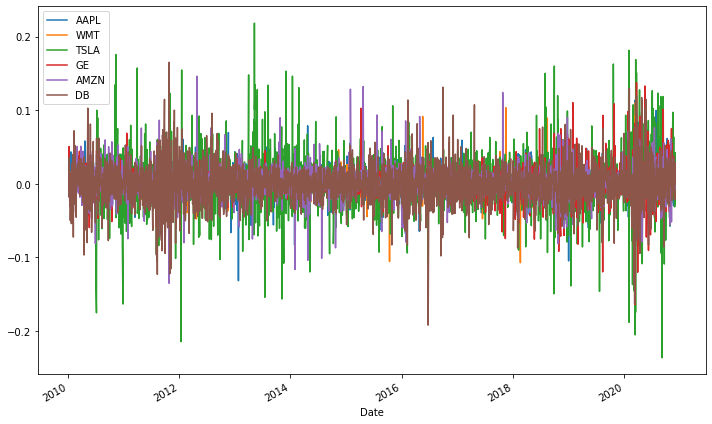

In [7]:
# Plot the daily returns over time

returns.plot(figsize=(10,6))
plt.tight_layout()
plt.show()

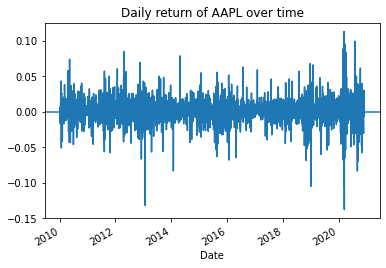

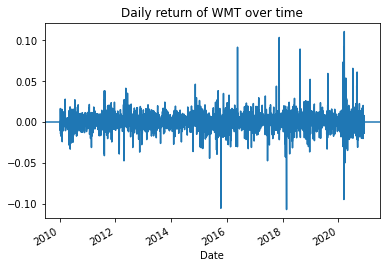

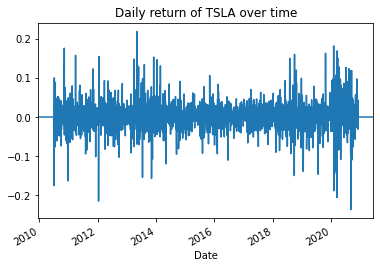

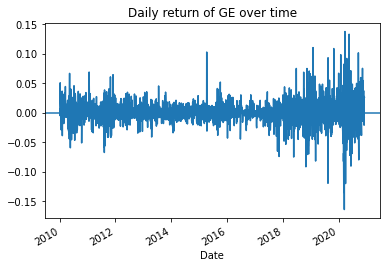

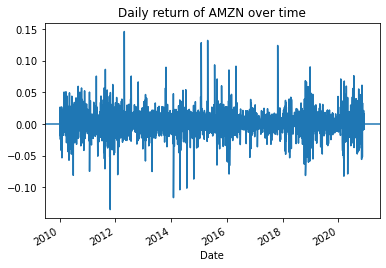

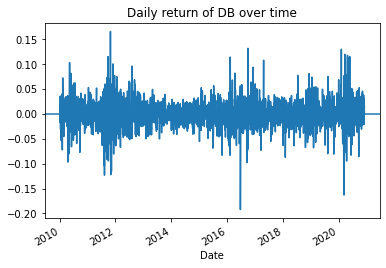

In [8]:
# Plot the each stock's daily return over time

for col in returns.columns: 
    returns[col].plot()
    plt.title(f"Daily return of {col} over time")
    plt.axhline(y=0)
    plt.show()

**Takeaways**
- Shown in the histograms, the daily returns of the six stocks look normally distributed. 
- The scatterplots overtime indicate that daily returns are moving around the zero along with the time. 

### Calculate the mean and covariance within the specified time window

In [9]:
# Compute the mean of the individual asset in the time window in the unit of year
# There are 252 trading days within a year

means = returns.mean()*252
means

AAPL    0.268325
WMT     0.116970
TSLA    0.463276
GE      0.000335
AMZN    0.289759
DB     -0.147775
dtype: float64

In [10]:
# Compute the std of the individual asset

stds = returns.std()*252
stds

AAPL    4.498135
WMT     3.013351
TSLA    8.895393
GE      5.021312
AMZN    5.031014
DB      6.654681
dtype: float64

In [11]:
# Compute the covariance matrix 

covariances = returns.cov()*252
covariances

,AAPL,WMT,TSLA,GE,AMZN,DB
AAPL,0.080291,0.016361,0.049215,0.031413,0.040401,0.042525
WMT,0.016361,0.036033,0.015510,0.014062,0.014887,0.019045
TSLA,0.049215,0.015510,0.314000,0.040401,0.056750,0.059831
GE,0.031413,0.014062,0.040401,0.100054,0.026848,0.066223
AMZN,0.040401,0.014887,0.056750,0.026848,0.100441,0.042435
DB,0.042525,0.019045,0.059831,0.066223,0.042435,0.175733


### Generate a random weight for the portfolio
- weights defines the relative proportion of the assetts in the portfolio.

In [12]:
# Generate 6 random numbers between 0 and 1
weights = np.random.random(len(stocks))

# Calculate the percentage of the weights
weights = weights/np.sum(weights)
weights

array([0.02763188, 0.32340828, 0.11644302, 0.1994327 , 0.03139151,
       0.30169261])

### Calculate the expected portfolio return

In [22]:
portfolio_return = np.sum(returns.mean()*weights*252)
portfolio_return

0.13836321804622434

### Calculate the expected portfolio variance

In [24]:
portfolio_variance = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
portfolio_variance

0.2846422280613161

### Generate the random portfolios using Monte-Carlo simulations

In [16]:
# Define two variables

preturns = []
pvariances = []

for i in range (10000):
    weights = np.random.random(len(stocks))
    weights /= np.sum(weights)
    preturns.append(np.sum(returns.mean()*weights)*252)
    pvariances.append(np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights))))
    
# Convert to np array

preturns = np.array(preturns)
pvariances = np.array(pvariances)

# Print the returns and variances

print(preturns[:5])
print(pvariances[:5])

[0.1570479  0.1117343  0.26179393 0.08983921 0.15254124]
[0.20682014 0.21003884 0.25440385 0.2473215  0.24953187]


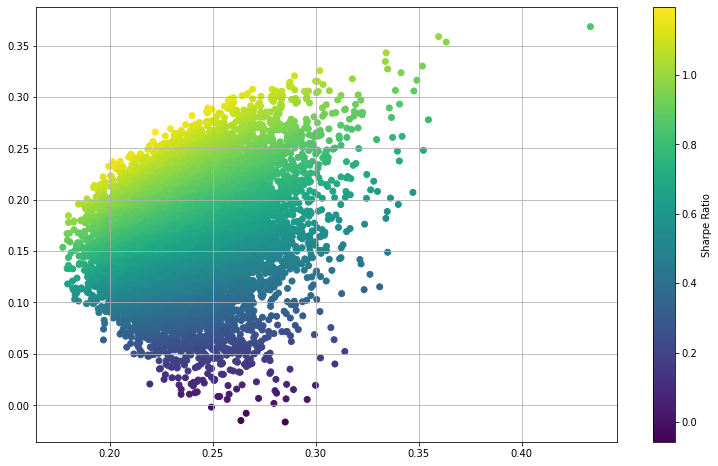

In [17]:
# Plot the return against the variances

plt.figure(figsize=(13,8))
plt.scatter(x=pvariances, y=preturns, c=preturns/pvariances)
plt.grid(True)
plt.colorbar(label='Sharpe Ratio')
plt.show()

### Optimization to find the optimal portfolio

In [20]:
# Take a peek at the returns
returns.head()

,AAPL,WMT,TSLA,GE,AMZN,DB
Date,,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2010-01-05,0.001727,-0.010008,NaN,0.005165,0.005883,0.018937
2010-01-06,-0.016034,-0.002237,NaN,-0.005165,-0.018282,-0.017436
2010-01-07,-0.001850,0.000560,NaN,0.050484,-0.017160,0.011254
2010-01-08,0.006626,-0.005050,NaN,0.021310,0.026717,0.035496


In [29]:
# Take a peak at the initial weights
weights

array([0.08616566, 0.08145203, 0.28503028, 0.17378952, 0.06585245,
       0.30771006])

In [77]:
# Define the objective function
# The goal is to maximize the Sharpe ratio (same as minimize negative shapre ratio)
# The variables are: weights, returns

# Firstly, to define a function to compute the exptected reutrn, volatility and sharpe ratio

def statistics(weights, returns):
    portfolio_returns = np.sum(returns.mean()*weights)*252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov()*252, weights)))
    return np.array([portfolio_returns, portfolio_volatility, portfolio_returns/portfolio_volatility])

# Define the objective function

def objective(weights, returns):
    return -statistics(weights, returns)[2]

In [78]:
# Define the equity constraint

def constraint(weights):
    return np.sum(weights) - 1

# Create the equity constraint
con = {'type': 'eq', 'fun': constraint}

In [79]:
# Set up the bound for the weight of each stock

b = (0,1)
bounds = tuple(b for x in range(len(stocks)))
bounds

((0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1))

In [80]:
# To minimize the objective function

sol = optimization.minimize(fun=objective, x0=weights, args=returns, 
                            method='SLSQP', bounds=bounds, constraints=con)

# Print the solution
sol

     fun: -1.2130795801017682
     jac: array([ 1.19300187e-03, -8.32527876e-05, -1.53028965e-03,  6.89667195e-01,
       -4.74333763e-04,  1.67524186e+00])
 message: 'Optimization terminated successfully.'
    nfev: 74
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([3.19374884e-01, 2.62800672e-01, 1.54324080e-01, 8.50014503e-17,
       2.63500363e-01, 0.00000000e+00])

In [87]:
# Print the optimal weights
print("The optimal weights: ", sol.x.round(3))

The optimal weights:  [0.319 0.263 0.154 0.    0.264 0.   ]


In [85]:
# Print the expected return, variance and sharpe ratio

print("The expected reutrn, variance and sharpe ratio: ", statistics(sol.x.round(3), returns))

The expected reutrn, variance and sharpe ratio:  [0.26419957 0.21779255 1.21307898]
